# ADS 509 Assignment 2.1: Tokenization, Normalization, Descriptive Statistics 

This notebook holds Assignment 2.1 for Module 2 in ADS 509, Applied Text Mining. Work through this notebook, writing code and answering questions where required. 

In the previous assignment you pulled lyrics data on two artists. In this assignment we explore this data set and a pull from the now-defunct Twitter API for the artists Cher and Robyn.  If, for some reason, you did not complete that previous assignment, data to use for this assignment can be found in the assignment materials section of Canvas. 

This assignment asks you to write a short function to calculate some descriptive statistics on a piece of text. Then you are asked to find some interesting and unique statistics on your corpora. 


In [1]:
import os
import re
import emoji
import pandas as pd
import numpy as np

from collections import Counter, defaultdict
from nltk.corpus import stopwords
from string import punctuation

sw = stopwords.words("english")

In [2]:
# change `data_location` to the location of the folder on your machine.
data_location = "./M1 Results"

# These subfolders should still work if you correctly stored the 
# data from the Module 1 assignment
twitter_folder = "twitter/"
lyrics_folder = "lyrics/"

In [3]:
def descriptive_stats(tokens, num_tokens = 5, verbose=True) :
    """
        Given a list of tokens, print number of tokens, number of unique tokens, 
        number of characters, lexical diversity (https://en.wikipedia.org/wiki/Lexical_diversity), 
        and num_tokens most common tokens. Return a list with the number of tokens, number
        of unique tokens, lexical diversity, and number of characters. 
    
    """

    # Fill in the correct values here. 
    num_tokens = len(tokens)
    num_unique_tokens = len(set(tokens))
    lexical_diversity = num_unique_tokens / num_tokens
    num_characters = sum(len(s) for s in tokens)
    
    if verbose :        
        print(f"There are {num_tokens} tokens in the data.")
        print(f"There are {num_unique_tokens} unique tokens in the data.")
        print(f"There are {num_characters} characters in the data.")
        print(f"The lexical diversity is {lexical_diversity:.3f} in the data.")
    
        # print the five most common tokens
        token_counts = Counter(tokens)
        most_common_tokens = token_counts.most_common(5)
        print(f"The 5 most common tokens are:")
        for token, count in most_common_tokens:
            print(f"{token}: {count}")
        
    return([num_tokens, num_unique_tokens,
            lexical_diversity,
            num_characters])

In [4]:
text = """here is some example text with other example text here in this text""".split()
assert(descriptive_stats(text, verbose=True)[0] == 13)
assert(descriptive_stats(text, verbose=False)[1] == 9)
assert(abs(descriptive_stats(text, verbose=False)[2] - 0.69) < 0.02)
assert(descriptive_stats(text, verbose=False)[3] == 55)


There are 13 tokens in the data.
There are 9 unique tokens in the data.
There are 55 characters in the data.
The lexical diversity is 0.692 in the data.
The 5 most common tokens are:
text: 3
here: 2
example: 2
is: 1
some: 1


Q: Why is it beneficial to use assertion statements in your code? 

A: Assertion statements allow us to test in an automated way so that we can know that the code meets our expectations.

## Data Input

Now read in each of the corpora. For the lyrics data, it may be convenient to store the entire contents of the file to make it easier to inspect the titles individually, as you'll do in the last part of the assignment. In the solution, I stored the lyrics data in a dictionary with two dimensions of keys: artist and song. The value was the file contents. A data frame would work equally well. 

For the Twitter data, we only need the description field for this assignment. Feel free all the descriptions read it into a data structure. In the solution, I stored the descriptions as a dictionary of lists, with the key being the artist. 




In [5]:
# Read in the lyrics data
lyrics = {}
for folder in os.listdir(os.path.join(data_location, lyrics_folder)):
    for filename in os.listdir(os.path.join(data_location, lyrics_folder, folder)):
        if filename.endswith(".txt") :
            with open(os.path.join(data_location, lyrics_folder, folder, filename), "r") as f:
                pattern = r"^[^_]+_(.+)\.txt$"
                match = re.match(pattern, filename)
                if match:
                    title = match.group(1)
                    if folder not in lyrics:
                        lyrics[folder] = {
                            title: f.read()
                        }
                    else:
                        lyrics[folder][title] = f.read()

# check that we read in the correct number of files
assert(len(lyrics['cher']) == 316)
assert(len(lyrics['robyn']) == 104)

In [6]:
# Read in the twitter data
tweets = {}
twitter_dir = os.path.join(data_location, twitter_folder)
for filename in os.listdir(twitter_dir):
    if filename.endswith("_data.txt") :
        # match for the artist in the filename
        pattern = re.compile(r"^([a-zA-Z0-9]+)_followers_data\.txt$")
        match = pattern.match(filename)
        if match:
            artist = match.group(1)
            twitter_df = pd.read_csv(os.path.join(data_location, twitter_folder, filename), 
                                    delimiter="\t", 
                                    usecols=["description"],
                                    on_bad_lines="warn")
            descriptions = twitter_df['description'].tolist()
            if artist not in tweets:
                tweets[artist] = descriptions
            else:
                tweets[artist].append(descriptions)

## Data Cleaning

Now clean and tokenize your data. Remove punctuation chacters (available in the `punctuation` object in the `string` library), split on whitespace, fold to lowercase, and remove stopwords. Store your cleaned data, which must be accessible as an interable for `descriptive_stats`, in new objects or in new columns in your data frame. 



In [7]:
punctuation = set(punctuation) # speeds up comparison

In [8]:
# create your clean twitter data here
cleaned_tweets = {}
for artist in tweets:
    clean_descriptions = []    
    for i, description in enumerate(tweets[artist]):
        if isinstance(description, str):
            # convert to lowercase
            description = description.lower()

            # remove punctuation
            description = ''.join(char for char in description if char not in punctuation)
           
            # tokenize by splitting on whitespace
            tokens = description.split()
            
            # remove stopwords
            tokens = [word for word in tokens if word not in sw]
            clean_description = ' '.join(tokens)
            clean_descriptions.append(clean_description)
    cleaned_tweets[artist] = clean_descriptions

In [9]:
# create your clean lyrics data here
cleaned_lyrics = {}
for artist in lyrics:
    clean_lyrics = []    
    for title in lyrics[artist]:
        # convert to lowercase
        lyric = lyrics[artist][title].lower()    
        
        # remove punctuation
        lyric = ''.join(char for char in lyric if char not in punctuation)
        
        # tokenize by splitting on whitespace
        tokens = lyric.split()
        
        # remove stopwords
        tokens = [word for word in tokens if word not in sw]
        lyric = ' '.join(tokens)
        clean_lyrics.append(lyric)
    cleaned_lyrics[artist] = clean_lyrics

In [10]:
cher_lyrics = ' '.join(cleaned_lyrics['cher'])
robyn_lyrics = ' '.join(cleaned_lyrics['robyn'])
cher_tweets = ' '.join(cleaned_tweets['cher'])
robyn_tweets = ' '.join(cleaned_tweets['robynkonichiwa'])

## Basic Descriptive Statistics

Call your `descriptive_stats` function on both your lyrics data and your twitter data and for both artists (four total calls). 

In [11]:
# calls to descriptive_stats here
print("Cher Lyrics Stats:")
descriptive_stats(cher_lyrics.split())
print()
print("Robyn Lyrics Stats:")
descriptive_stats(robyn_lyrics.split())
print()
print("Cher Tweets Stats:")
descriptive_stats(cher_tweets.split())
print()
print("Robyn Tweets Stats:")
descriptive_stats(robyn_tweets.split())


Cher Lyrics Stats:
There are 35916 tokens in the data.
There are 3703 unique tokens in the data.
There are 172634 characters in the data.
The lexical diversity is 0.103 in the data.
The 5 most common tokens are:
love: 1004
im: 513
know: 486
dont: 440
youre: 333

Robyn Lyrics Stats:
There are 15227 tokens in the data.
There are 2156 unique tokens in the data.
There are 73787 characters in the data.
The lexical diversity is 0.142 in the data.
The 5 most common tokens are:
know: 308
dont: 301
im: 299
love: 275
got: 251

Cher Tweets Stats:
There are 16189025 tokens in the data.
There are 1708423 unique tokens in the data.
There are 96295710 characters in the data.
The lexical diversity is 0.106 in the data.
The 5 most common tokens are:
love: 214710
im: 139147
life: 123013
music: 88244
de: 73365

Robyn Tweets Stats:
There are 1538163 tokens in the data.
There are 271325 unique tokens in the data.
There are 9397180 characters in the data.
The lexical diversity is 0.176 in the data.
The 5 mo

[1538163, 271325, 0.1763954795428053, 9397180]

Q: How do you think the "top 5 words" would be different if we left stopwords in the data? 

A: The top 5 words would probably be dominated by common articles, prepositions and pronouns like "the", "a", "is", "i", "you" and "and."

---

Q: What were your prior beliefs about the lexical diversity between the artists? Does the difference (or lack thereof) in lexical diversity between the artists conform to your prior beliefs? 

A: I didn't have any prior beliefs since I've never listened to either of their music. I wasn't surprised that the word "love" appeared in the top 5 words of both artists' lyrics as it is a common, popular theme. I'm not particularly surprised by the lack of lexical diversity since functional fluency in English is only about 4000-5000 unique words. Most popular music probably falls into this range of words since it can be generally understood by the majority of listeners.



## Specialty Statistics

The descriptive statistics we have calculated are quite generic. You will now calculate a handful of statistics tailored to these data.

1. Ten most common emojis by artist in the twitter descriptions.
1. Ten most common hashtags by artist in the twitter descriptions.
1. Five most common words in song titles by artist. 
1. For each artist, a histogram of song lengths (in terms of number of tokens) 

We can use the `emoji` library to help us identify emojis and you have been given a function to help you.


In [12]:
assert(emoji.is_emoji("❤️"))
assert(not emoji.is_emoji(":-)"))

### Emojis 😁

What are the ten most common emojis by artist in the twitter descriptions? 


In [13]:
def top_5_emojis(tweets):
    tokens = []
    for char in tweets:
        if emoji.is_emoji(char):
            tokens.append(char)
    token_counts = Counter(tokens)
    most_common_tokens = token_counts.most_common(5)
    for token, count in most_common_tokens:
        print(f"{token}: {count}")

print("Top 5 Emojis in Cher Tweets:")
top_5_emojis(cher_tweets)

print("Top 5 Emojis in Robyn Tweets:")
top_5_emojis(robyn_tweets)


Top 5 Emojis in Cher Tweets:
❤: 79481
🌈: 47853
♥: 34304
🏳: 33640
✨: 29776
Top 5 Emojis in Robyn Tweets:
❤: 4808
🌈: 4702
🏳: 3539
♥: 3117
✨: 2240


### Hashtags

What are the ten most common hashtags by artist in the twitter descriptions? 


In [14]:
def top_10_hashtags(tweets):
    tokens = []
    for tweet in tweets:
        if not isinstance(tweet, str):
            continue
        words = tweet.split()
        for word in words:
            if word.startswith('#'):
                tokens.append(word)
    token_counts = Counter(tokens)
    most_common_tokens = token_counts.most_common(10)
    for token, count in most_common_tokens:
        print(f"{token}: {count}")

print("Top 10 Hashtags in Cher Tweets:")
top_10_hashtags(tweets['cher'])
print()

print("Top 10 Hashtags in Robyn Tweets:")
top_10_hashtags(tweets['robynkonichiwa'])

Top 10 Hashtags in Cher Tweets:
#BLM: 7925
#Resist: 5006
#BlackLivesMatter: 4228
#resist: 3133
#FBR: 2767
#blacklivesmatter: 2464
#TheResistance: 2459
#1: 2231
#: 1977
#Resistance: 1516

Top 10 Hashtags in Robyn Tweets:
#BlackLivesMatter: 311
#BLM: 274
#blacklivesmatter: 200
#1: 187
#: 151
#music: 150
#Music: 93
#EDM: 79
#blm: 51
#TeamFollowBack: 51


### Song Titles

What are the five most common words in song titles by artist? The song titles should be on the first line of the lyrics pages, so if you have kept the raw file contents around, you will not need to re-read the data.


In [15]:
def top_5_words_in_titles(lyrics):
    tokens = []
    for song in lyrics:
        lyric = lyrics[song]
        match = re.match(r'"([^"]*)"', lyric)
        if match:
            title = match.group(1).lower()
            for word in title.split():
                if word not in sw:
                    tokens.append(word.lower())
    token_counts = Counter(tokens)
    most_common_tokens = token_counts.most_common(5)
    for token, count in most_common_tokens:
        print(f"{token}: {count}")

print("Top 5 Words in Cher Song Titles:")
top_5_words_in_titles(lyrics['cher'])
print()
print("Top 5 Words in Robyn Song Titles:")
top_5_words_in_titles(lyrics['robyn'])

Top 5 Words in Cher Song Titles:
love: 38
man: 12
song: 11
one: 7
come: 6

Top 5 Words in Robyn Song Titles:
love: 6
u: 4
hang: 3
tell: 3
girl: 3


### Song Lengths

For each artist, a histogram of song lengths (in terms of number of tokens). If you put the song lengths in a data frame with an artist column, matplotlib will make the plotting quite easy. An example is given to help you out. 


artist
Artist 1    Axes(0.125,0.11;0.775x0.77)
Artist 2    Axes(0.125,0.11;0.775x0.77)
Name: length, dtype: object

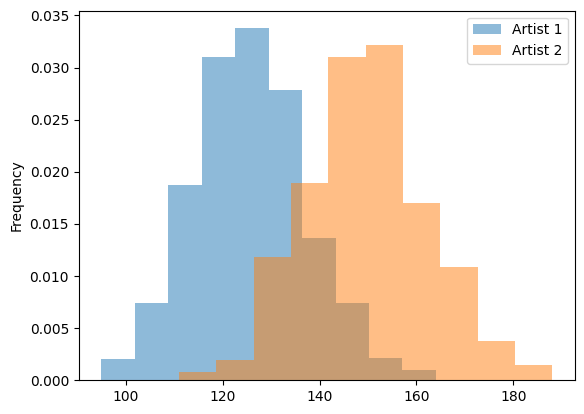

In [16]:
num_replicates = 1000

df = pd.DataFrame({
    "artist" : ['Artist 1'] * num_replicates + ['Artist 2']*num_replicates,
    "length" : np.concatenate((np.random.poisson(125,num_replicates),np.random.poisson(150,num_replicates)))
})

df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)

Since the lyrics may be stored with carriage returns or tabs, it may be useful to have a function that can collapse whitespace, using regular expressions, and be used for splitting. 

Q: What does the regular expression `'\s+'` match on? 

A: It matches one or more whitespace characters including spaces, tabs, newlines, form feeds, and carriage returns.


In [17]:
collapse_whitespace = re.compile(r'\s+')

def tokenize_lyrics(lyric) : 
    """strip and split on whitespace"""
    return([item.lower() for item in collapse_whitespace.split(lyric)])

artist
cher     Axes(0.125,0.11;0.775x0.77)
robyn    Axes(0.125,0.11;0.775x0.77)
Name: length, dtype: object

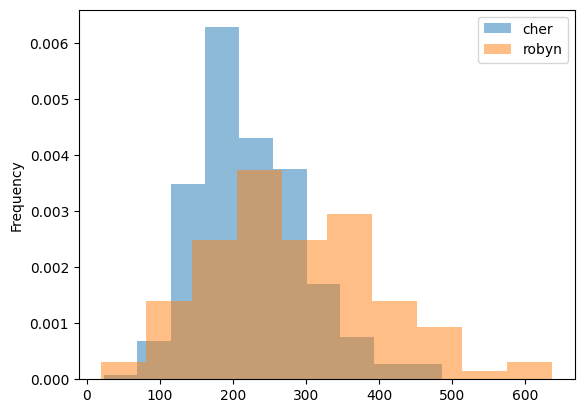

In [18]:
# Your lyric length comparison chart here.
cher_lyrics_collapsed = [len(tokenize_lyrics(lyrics['cher'][lyric])) for lyric in lyrics['cher']]
robyn_lyrics_collapsed = [len(tokenize_lyrics(lyrics['robyn'][lyric])) for lyric in lyrics['robyn']]

df = pd.DataFrame({
    "artist" : ['cher'] * len(lyrics['cher']) + ['robyn'] * len(lyrics['robyn']),
    "length" : cher_lyrics_collapsed + robyn_lyrics_collapsed
})

df.groupby('artist')['length'].plot(kind="hist",density=True,alpha=0.5,legend=True)